# Set de datos sobre Cancer Cerebral
### Por: *Marcos Figueroa - Álvaro Monsalve*  
### Tutores: *José Reyes- Sebástian Bustamante*
### Métodos de Aprendizajes Automáticos Aplicados
### IDVRV - Univesidad de Talca
---
### La columna de imagen define el nombre de la imagen y la columna de clase define si la imagen tiene tumor o no (1 = tumor, 0 = no tumor)
### 
### Los examenes son resonancias magneticas y esta es una referencia:
### ![brain](referenceimage.png)
---
---
## Referencia:
### Dataset Kaggle [BrainTumor](https://www.kaggle.com/datasets/jakeshbohaju/brain-tumor)

In [56]:
# Primero es importante exportar las librerias necesarias para trabajar el archivo de tipo.csv

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [57]:
# Impresión del dataset.
df_brain_tumor = pd.read_csv("brain_tumor.csv")

#Normalizacion del set de datos

In [58]:
##dfskewness = df_brain_tumor[df_brain_tumor["Skewness"] > 0 and df_brain_tumor[df_brain_tumor["Skewness"]] < 0]
##print(dfskewness.sum())




### Revisar si el dataset contiene datos erroneos

In [59]:
# Revisar la cantidad de datos perdidos, es decir, NaN (Not a Number) dentro de un dataframe de pandas
df_brain_tumor.isna().sum()

Image                 0
Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64

# Revisión de datos duplicados

In [60]:
print(df_brain_tumor.duplicated().sum())

0


# Describe

In [61]:
# Mas descriptores generales
df_general = df_brain_tumor.describe()

df_general.to_csv('archivo_general.csv', index=False)

# Info

In [62]:
df_brain_tumor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

# Primeros 5 y últimos datos.

In [63]:
df_brain_tumor.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [64]:
df_brain_tumor.tail()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
3757,Image3758,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,Image3759,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,Image3760,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,Image3761,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155
3761,Image3762,0,6.110138,480.884025,21.929068,0.118171,4.110669,17.538826,239.251388,0.306224,0.093773,0.494333,6.787329,0.938731,7.458341e-155


# Tipo de dato de cada columna

In [65]:
df_brain_tumor.dtypes

Image                  object
Class                   int64
Mean                  float64
Variance              float64
Standard Deviation    float64
Entropy               float64
Skewness              float64
Kurtosis              float64
Contrast              float64
Energy                float64
ASM                   float64
Homogeneity           float64
Dissimilarity         float64
Correlation           float64
Coarseness            float64
dtype: object

# Valores unicos de cada columna

In [66]:
cols = df_brain_tumor.columns.tolist()
for col in cols:
  print(f"{col}: {df_brain_tumor[col].unique()}")

Image: ['Image1' 'Image2' 'Image3' ... 'Image3760' 'Image3761' 'Image3762']
Class: [0 1]
Mean: [ 6.53533936  8.74996948  7.34109497 ... 18.01152039 13.33042908
  6.11013794]
Variance: [ 619.58784457  805.957634   1143.80821918 ... 1151.58276464  945.73277931
  480.88402451]
Standard Deviation: [24.89152154 28.38939298 33.82023387 ... 33.93497848 30.75276864
 21.92906803]
Entropy: [0.10905901 0.26653831 0.00146681 ... 0.06839642 0.08787158 0.11817106]
Skewness: [4.27647703 3.71811563 5.06175041 ... 2.30834902 2.73282188 4.11066928]
Kurtosis: [18.90057479 14.46461754 26.47956316 ...  5.57949801  7.75756973
 17.53882608]
Contrast: [ 98.61397059  63.85881588  81.86720593 ... 167.13011775 223.81293215
 239.25138757]
Energy: [0.2933145  0.4750513  0.03191671 ... 0.22892964 0.26152746 0.30622405]
ASM: [0.08603339 0.22567373 0.00101868 ... 0.05240878 0.06839661 0.09377317]
Homogeneity: [0.53094113 0.65135203 0.26827489 ... 0.49226894 0.48006365 0.49433266]
Dissimilarity: [4.47334559 3.22007157

# Generar un dataframe a partir de otro
## En este caso generaremos uno a partir de todos los elementos que tengan en clase igual a 1

# Correlación

In [67]:
#Importar librería
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#Excluir lo datos categoricos
df_numerico = df_brain_tumor.select_dtypes(include=[float])
df_no_numerico = df_brain_tumor.select_dtypes(exclude=[float])

#Escalar el dataframe
scaler = MinMaxScaler()
df_normalizado = pd.DataFrame(scaler.fit_transform(df_numerico), columns=df_numerico.columns)
df_final = pd.concat([df_no_numerico.reset_index(drop=True), df_normalizado], axis=1)
#print(df_final.head())
#
df_final.to_csv('dataset_normalizado.csv', index=False)
df_final.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,0.194705,0.212023,0.443074,0.274801,0.068211,0.010937,0.028236,0.475410,0.246092,0.603108,0.139694,0.981764,0.0
1,Image2,0,0.261489,0.276124,0.510114,0.674843,0.052278,0.007693,0.017951,0.797096,0.648383,0.773800,0.093527,0.997417,0.0
2,Image3,1,0.219003,0.392326,0.614200,0.001487,0.090618,0.016478,0.023280,0.012719,0.001173,0.230760,0.195261,0.972855,0.0
3,Image4,1,0.177300,0.329007,0.559750,0.001513,0.108202,0.021559,0.043805,0.012908,0.001192,0.196137,0.258588,0.941475,0.0
4,Image5,0,0.218223,0.249840,0.483677,0.370574,0.068403,0.011067,0.050836,0.564860,0.338854,0.560862,0.226679,0.960995,0.0


## Dividiendo los datos

Precisión: 0.98
Matriz de Confusión:
[[416   3]
 [ 11 323]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       419
           1       0.99      0.97      0.98       334

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753



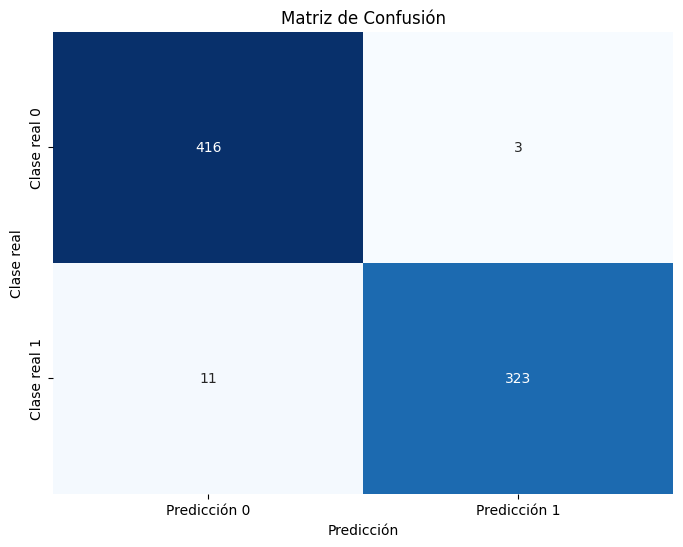

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Dividir el set de datos para entrenamiento
X = df_final.drop(['Class', 'Image'], axis=1)  # Características
y = df_final['Class'] #Etiqueta

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo KNN
knn = KNeighborsClassifier(n_neighbors=3) 

# Entrenar el modelo
knn.fit(X_train, y_train)

# Hacer predicciones
y_pred = knn.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Informe de Clasificación:')
print(class_report)

# Visualizar la matriz de confusión con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=[f'Predicción {i}' for i in range(conf_matrix.shape[1])], 
            yticklabels=[f'Clase real {i}' for i in range(conf_matrix.shape[0])])

plt.xlabel('Predicción')
plt.ylabel('Clase real')
plt.title('Matriz de Confusión')
plt.show()

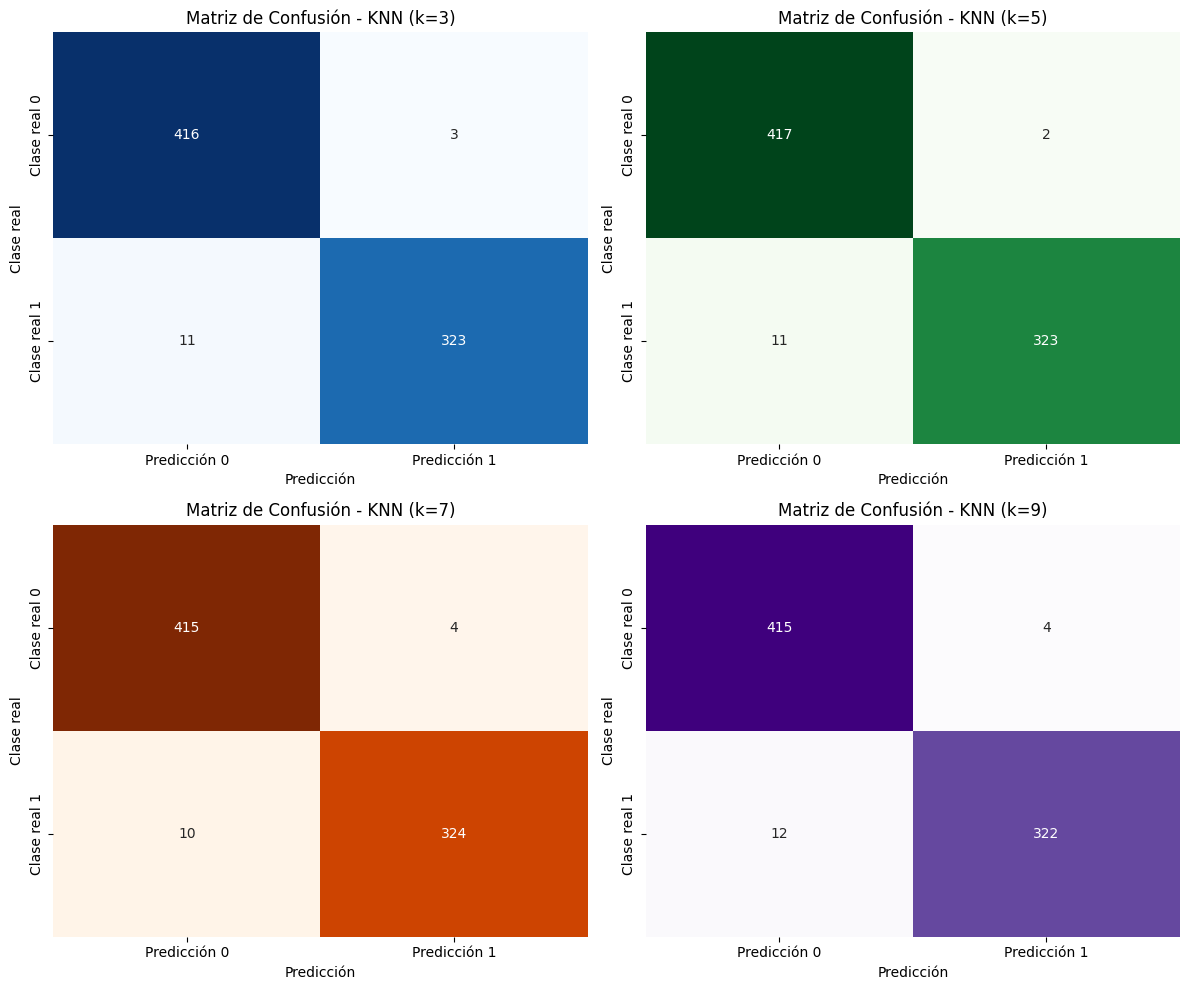

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Dividir el set de datos para entrenamiento
X = df_final.drop(['Class', 'Image'], axis=1)  # Características
y = df_final['Class']  # Etiqueta

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = [3, 5, 7, 9]
color_maps = ['Blues', 'Greens', 'Oranges', 'Purples']  

plt.figure(figsize=(12, 10))

for i, (k, cmap) in enumerate(zip(k_values, color_maps), 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Graficar matriz de confusión en un subplot con colores distintos
    plt.subplot(2, 2, i)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, cbar=False,
                xticklabels=[f'Predicción {i}' for i in range(conf_matrix.shape[1])],
                yticklabels=[f'Clase real {i}' for i in range(conf_matrix.shape[0])])
    plt.title(f'Matriz de Confusión - KNN (k={k})')
    plt.xlabel('Predicción')
    plt.ylabel('Clase real')

plt.tight_layout()
plt.show()